In [1]:
# Gradient Boosting Feature Selection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\train_data_2.csv")

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [5]:
train_data["land_surface_condition"] = encoder.fit_transform(train_data["land_surface_condition"])
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])
train_data["position"] = encoder.fit_transform(train_data["position"])
train_data["plan_configuration"] = encoder.fit_transform(train_data["plan_configuration"])
train_data["legal_ownership_status"] = encoder.fit_transform(train_data["legal_ownership_status"])

In [6]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,30,266,1224,1,25,5,2,2,2,0,...,0,0,0,0,0,0,0,0,0,2
1,17,409,12182,2,0,13,7,2,2,0,...,0,0,0,0,0,0,0,0,0,3
2,17,716,7056,2,5,12,6,1,2,1,...,0,0,0,0,0,0,0,0,0,3
3,4,651,105,2,80,5,4,0,2,0,...,0,0,0,0,0,0,0,0,0,2
4,3,1387,3909,5,40,5,10,2,2,0,...,0,0,0,0,0,0,0,0,0,2


In [7]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,38].values

In [18]:
x.shape[1]

38

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [10]:
feature_importance = classifier.feature_importances_

In [11]:
#Sort features in decreasing order of importance (by scores)
sorted_fi = feature_importance.argsort()[::-1]

# Print the feature importance scores
for i in sorted_fi:
    print(f"{train_data.columns[i]}: {feature_importance[i]} \n{i}")


geo_level_1_id: 0.530883339004708 
0
foundation_type: 0.10544805454700078 
8
has_superstructure_mud_mortar_stone: 0.07025478275556533 
15
roof_type: 0.06359228785874306 
9
age: 0.05089273068843318 
4
geo_level_2_id: 0.03901071600447887 
1
has_superstructure_cement_mortar_brick: 0.03368630149667877 
19
ground_floor_type: 0.016376379535427293 
10
other_floor_type: 0.013169984912367058 
11
has_superstructure_adobe_mud: 0.01283546721504236 
14
count_floors_pre_eq: 0.011297584104874305 
3
has_superstructure_stone_flag: 0.010266822678603738 
16
area_percentage: 0.005700824682295296 
5
geo_level_3_id: 0.005314780826316194 
2
has_superstructure_timber: 0.0053103434515715175 
20
has_superstructure_mud_mortar_brick: 0.0043139091445496235 
18
count_families: 0.003935564735826231 
26
has_secondary_use: 0.003765842879989027 
27
has_superstructure_rc_engineered: 0.0025516859494545564 
23
position: 0.00211160006326084 
12
has_superstructure_cement_mortar_stone: 0.0017869306651523155 
17
height_percen

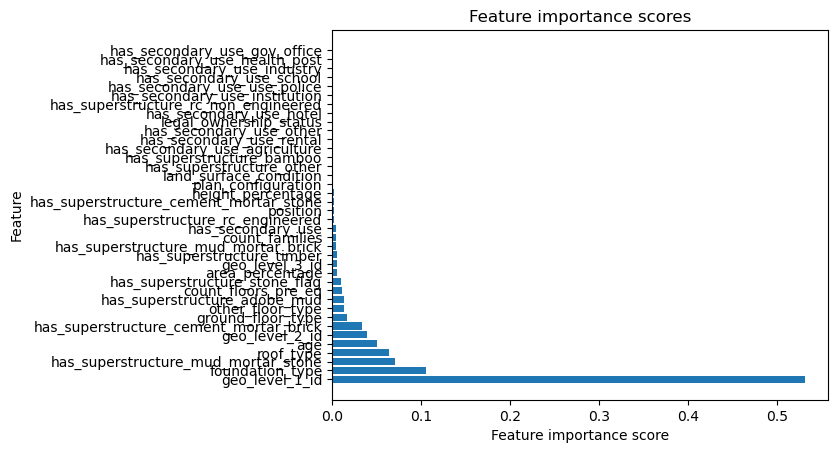

In [12]:
# Create a horizontal bar chart of feature importance scores
plt.barh(train_data.columns[sorted_fi], feature_importance[sorted_fi])
plt.xlabel('Feature importance score')
plt.ylabel('Feature')
plt.title('Feature importance scores')
plt.show()